In [23]:
import import_ipynb
import data_preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

- remove seasonablity
- drop nans (if pre-processing from seasonality)
- others?

- get residuals for each timestep
- cluster the residuals
- adaptive thresholding
- 

In [16]:
# training data
u4_train_equil_turbine = data_preprocessing.u4_train_equil_turbine
u4_train_equil_pump = data_preprocessing.u4_train_equil_pump
u5_train_equil_turbine = data_preprocessing.u5_train_equil_turbine
u5_train_equil_pump = data_preprocessing.u5_train_equil_pump
u6_train_equil_turbine = data_preprocessing.u6_train_equil_turbine
u6_train_equil_pump = data_preprocessing.u6_train_equil_pump

# synethetic test sets
u5_s01_equil_turbine = data_preprocessing.u5_s01_equil_turbine
u5_s01_equil_pump = data_preprocessing.u5_s01_equil_pump
u5_s02_equil_turbine = data_preprocessing.u5_s02_equil_turbine
u5_s02_equil_pump = data_preprocessing.u5_s02_equil_pump
u6_s01_equil_turbine = data_preprocessing.u6_s01_equil_turbine
u6_s01_equil_pump = data_preprocessing.u6_s01_equil_pump
u6_s02_equil_turbine = data_preprocessing.u6_s02_equil_turbine
u6_s02_equil_pump = data_preprocessing.u6_s02_equil_pump

# real test sets
u4_test_equil_turbine = data_preprocessing.u4_test_equil_turbine
u4_test_equil_pump = data_preprocessing.u4_test_equil_pump
u5_test_equil_turbine = data_preprocessing.u5_test_equil_turbine
u5_test_equil_pump = data_preprocessing.u5_test_equil_pump
u6_test_equil_turbine = data_preprocessing.u6_test_equil_turbine
u6_test_equil_pump = data_preprocessing.u6_test_equil_pump

In [41]:
u5_train_equil_pump


,tot_activepower,ext_tmp,plant_tmp,charge,coupler_position,injector_01_opening,injector_02_opening,injector_03_opening,injector_04_opening,injector_05_opening,pump_calculated_flow,pump_pressure_diff,pump_rotspeed,tot_current,tot_effectivepower,tot_reactivepower,turbine_pressure,turbine_rotspeed,water_primary_pump_01_opening,water_primary_pump_02_opening,air_circ_cold_01_tmp,air_circ_cold_02_tmp,air_circ_cold_03_tmp,air_circ_cold_04_tmp,air_circ_cold_05_tmp,air_circ_cold_06_tmp,air_circ_hot_01_tmp,air_circ_hot_02_tmp,air_circ_hot_03_tmp,air_circ_hot_04_tmp,air_circ_hot_05_tmp,air_circ_hot_06_tmp,elec_freq,exc_current,exc_voltage,mid_voltage,neutral_current,ph01_current,ph01_voltage,ph12_voltage,ph02_current,ph02_voltage,ph23_voltage,ph03_current,ph03_voltage,ph31_voltage,stat_coil_ph01_01_tmp,stat_coil_ph01_02_tmp,stat_coil_ph01_03_tmp,stat_coil_ph01_04_tmp,stat_coil_ph01_05_tmp,stat_coil_ph01_06_tmp,stat_coil_ph02_01_tmp,stat_coil_ph02_02_tmp,stat_coil_ph02_03_tmp,stat_coil_ph02_04_tmp,stat_coil_ph02_05_tmp,stat_coil_ph02_06_tmp,stat_coil_ph03_01_tmp,stat_coil_ph03_02_tmp,stat_coil_ph03_03_tmp,stat_coil_ph03_04_tmp,stat_coil_ph03_05_tmp,stat_coil_ph03_06_tmp,stat_magn_01_tmp,stat_magn_02_tmp,stat_magn_03_tmp,stat_magn_04_tmp,stat_magn_05_tmp,stat_magn_06_tmp,stat_magn_07_tmp,stat_magn_08_tmp,stat_magn_09_tmp,stat_magn_10_tmp,stat_magn_11_tmp,stat_magn_12_tmp,water_circ_cold_tmp,water_circ_flow,water_circ_hot_01_tmp,water_circ_hot_02_tmp,water_circ_hot_03_tmp,water_circ_hot_04_tmp,water_circ_hot_05_tmp,water_circ_hot_06_tmp,water_circ_hot_tmp,air_gap_negative_x_position,air_gap_positive_x_position,air_gap_negative_y_position,air_gap_positive_y_position,machine_on,machine_off,turbine_mode,all,equilibrium_turbine_mode,dyn_only_on,pump_mode,short_circuit_mode,equilibrium_pump_mode,equilibrium_short_circuit_mode
2020-01-02 00:00:00+01:00,-119.619240,5.961580,16.350124,-1.590960,185.068454,0.0,0.0,0.0,0.0,0.0,12.848305,343.266693,499.306641,4386.408002,119.799896,6.347980,6.432000,498.580017,0.0,0.000045,16.299999,15.900000,16.299999,16.299999,16.200001,16.400,44.200001,43.645032,42.635322,43.601804,43.299999,43.700001,50.024130,898.175815,119.437046,9.039698,16.357291,4372.818503,9.035955,15.598351,4387.142703,9.008961,15.606375,4405.041504,9.034963,15.612593,57.099998,57.487188,58.500000,57.500000,65.546666,59.682907,59.200001,57.099998,56.646691,58.342488,66.032484,63.099998,56.700001,57.700001,58.200001,57.486755,66.701791,58.453310,58.468623,46.902992,60.235980,59.358717,46.799999,62.810068,46.960328,57.431777,60.190095,56.666856,46.975712,60.665824,14.333333,2573.881034,19.129412,19.200001,19.100000,19.022222,19.057143,18.800000,19.100000,36.958162,35.126421,37.224792,34.728680,True,False,False,True,False,True,True,False,True,False
2020-01-02 00:00:30+01:00,-119.155684,5.992895,16.349115,-1.561455,185.066912,0.0,0.0,0.0,0.0,0.0,12.853569,339.333344,499.146688,4405.302734,119.345898,6.648286,6.181333,498.533356,0.0,0.000050,16.299999,15.900000,16.299999,16.299999,16.200001,16.400,44.200001,43.649839,42.649083,43.615348,43.304999,43.700001,50.021876,904.826691,122.328908,9.038685,16.362499,4392.737932,9.035885,15.596642,4406.503278,9.009092,15.605350,4394.620605,9.034833,15.611835,57.099998,57.482197,58.500000,57.500000,65.568888,59.701667,59.200001,57.099998,56.670038,58.347335,66.051592,63.122899,56.700001,57.700001,58.205001,57.481788,66.728697,58.463763,58.495016,46.907975,60.267726,59.386240,46.811582,62.850337,46.968536,57.459814,60.226137,56.692352,46.984708,60.704226,13.800000,2573.666748,19.299999,19.400000,18.880000,19.187501,18.799999,18.980000,20.299999,36.954562,34.849265,37.205842,34.719360,True,False,False,True,False,True,True,False,True,False
2020-01-02 00:01:00+01:00,-118.311378,6.024210,16.348106,-1.722507,185.065370,0.0,0.0,0.0,0.0,0.0,12.876725,334.483337,499.200073,4372.821565,118.522987,7.215937,6.279111,498.333364,0.0,0.000054,16.299999,15.900000,16.299999,16.299999,16.200001,16.400,44.200001,43.654647,42.

In [17]:
pd.set_option('display.max_columns', None)
print(list(u5_train_equil_pump.columns))

['tot_activepower', 'ext_tmp', 'plant_tmp', 'charge', 'coupler_position', 'injector_01_opening', 'injector_02_opening', 'injector_03_opening', 'injector_04_opening', 'injector_05_opening', 'pump_calculated_flow', 'pump_pressure_diff', 'pump_rotspeed', 'tot_current', 'tot_effectivepower', 'tot_reactivepower', 'turbine_pressure', 'turbine_rotspeed', 'water_primary_pump_01_opening', 'water_primary_pump_02_opening', 'air_circ_cold_01_tmp', 'air_circ_cold_02_tmp', 'air_circ_cold_03_tmp', 'air_circ_cold_04_tmp', 'air_circ_cold_05_tmp', 'air_circ_cold_06_tmp', 'air_circ_hot_01_tmp', 'air_circ_hot_02_tmp', 'air_circ_hot_03_tmp', 'air_circ_hot_04_tmp', 'air_circ_hot_05_tmp', 'air_circ_hot_06_tmp', 'elec_freq', 'exc_current', 'exc_voltage', 'mid_voltage', 'neutral_current', 'ph01_current', 'ph01_voltage', 'ph12_voltage', 'ph02_current', 'ph02_voltage', 'ph23_voltage', 'ph03_current', 'ph03_voltage', 'ph31_voltage', 'stat_coil_ph01_01_tmp', 'stat_coil_ph01_02_tmp', 'stat_coil_ph01_03_tmp', 'stat_

In [18]:
features = [
    'tot_activepower', 'charge', 'coupler_position', 'injector_01_opening', 'injector_02_opening',
    'injector_03_opening', 'injector_04_opening', 'injector_05_opening', 'pump_calculated_flow',
    'pump_pressure_diff', 'pump_rotspeed', 'turbine_pressure', 'turbine_rotspeed',
    'water_primary_pump_01_opening', 'water_primary_pump_02_opening', 'timer_turbine_on_off'
]

In [43]:
# Check if 'timer_turbine_on_off' is present; if not, exclude it from the feature list
features = [feature for feature in features if feature in u5_train_equil_pump.columns]

target = 'stat_magn_01_tmp'

# Split the data into training and testing sets
X = u5_train_equil_pump[features]
y = u5_train_equil_pump[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 7.711699153360238
Root Mean Squared Error: 2.776994626094951


In [44]:
r_squared = r2_score(y_test, y_pred)
print(f"R squared : {r_squared}")

R squared : 0.9019370825959482


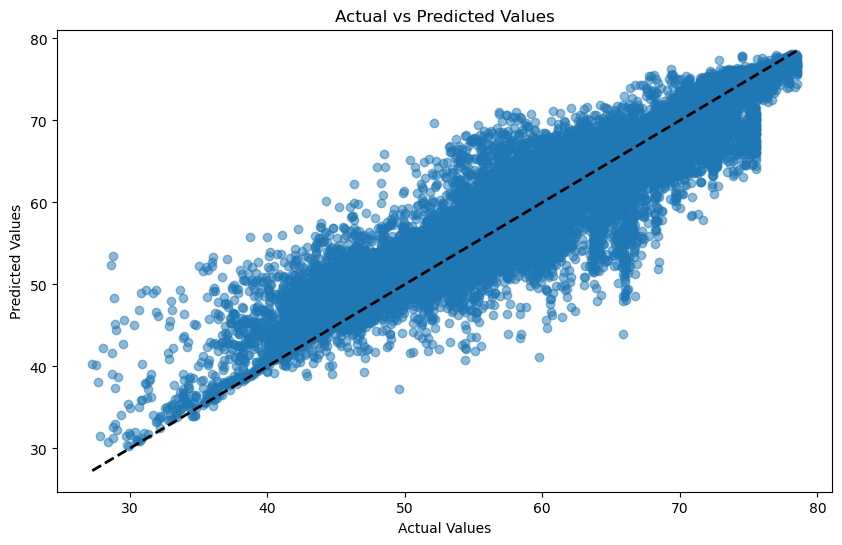

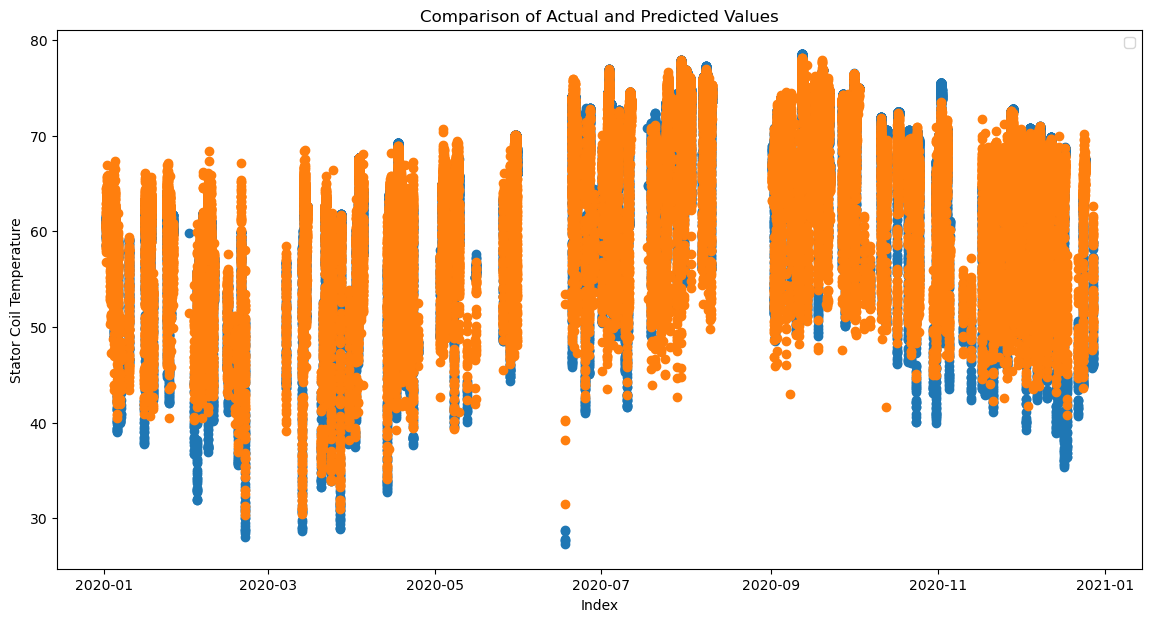

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

# Plot the actual and predicted values over the test set
plt.figure(figsize=(14, 7))
plt.scatter(y_test.index, y_test)
plt.scatter(y_test.index, y_pred)
# plt.plot(y_test.index, y_test, label='Actual Values', color='blue', marker='o')
# plt.plot(y_test.index, y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Stator Coil Temperature')
plt.legend()
plt.show()

Mean Squared Error on Synthetic Data: 37.68413157102391
Root Mean Squared Error on Synthetic Data: 6.138740226709705
R squared : 0.5292273728588706


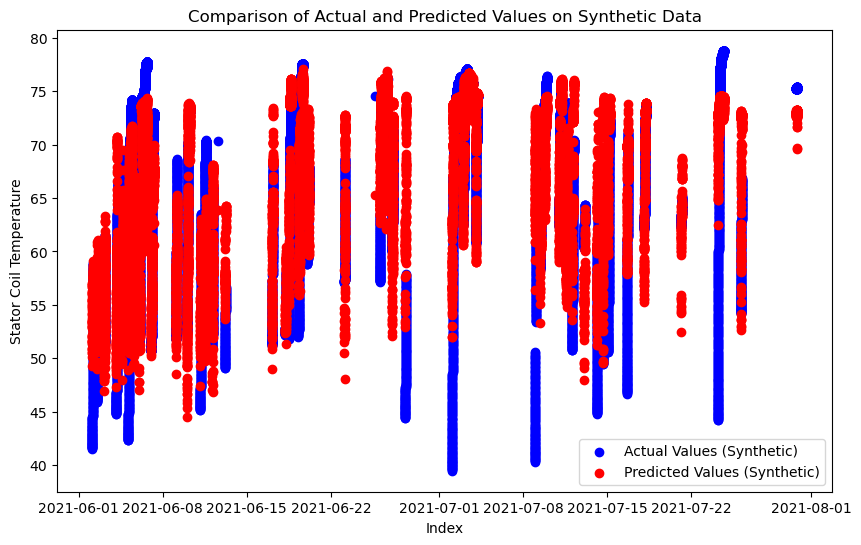

In [46]:
# Extracting the features and target from the synthetic test set
X_synthetic = u5_s01_equil_pump[features]
y_synthetic = u5_s01_equil_pump['stat_magn_01_tmp']

# Predict using the trained model
y_pred_synthetic = model.predict(X_synthetic)

# Evaluate the model performance on synthetic data
mse_synthetic = mean_squared_error(y_synthetic, y_pred_synthetic)
rmse_synthetic = np.sqrt(mse_synthetic)
r_squared_synthetic = r2_score(y_synthetic, y_pred_synthetic)

print(f'Mean Squared Error on Synthetic Data: {mse_synthetic}')
print(f'Root Mean Squared Error on Synthetic Data: {rmse_synthetic}')
print(f"R squared : {r_squared_synthetic}")

# Visualizing the results with a scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_synthetic.index, y_synthetic, label='Actual Values (Synthetic)', color='blue')
plt.scatter(y_synthetic.index, y_pred_synthetic, label='Predicted Values (Synthetic)', color='red')
plt.title('Comparison of Actual and Predicted Values on Synthetic Data')
plt.xlabel('Index')
plt.ylabel('Stator Coil Temperature')
plt.legend()
plt.show()